# Classification of fetal Health.
By Emily Amaach (1666651) and Adrian Soticiu (1601811).

# Introducció

La reducció de la mortalitat infantil és una de las misions principals de la humanitat, i que marca un gran progrés per la nostra societat. La gran majoria de la mortalitat infantil bé donada per situacions i casos **preventibles**, les quals les podriem predeeir amb molta antelació i donar una segona oportunitat de vida a aquestes infancies.

En aquest document, esperem poder crear un classificador suficientment correcta amd dades noves per poder ser utilitzada en casos reals.
Informació i base de dades agafada de: https://www.kaggle.com/andrewmvd/fetal-health-classification
Github del project: https://github.com/Stoic2514/CasKaggle

# Lectura i analisi de les dades

Primer de tot, important les llibreries necesaries i la base de dades, podem començar a llegir i analitzar les dades per poder preprocesar-les.
Com vegem, tenim varies variables, i la variable target, *fetal_health*, la qual pot tenir els valors 1, 2 o 3, de salut normal a patologica.
Les variables que tenim varien desde el Baseline Heart Rate, aka la base de palpitacions del cor del fetus, a aceleracions i deaceleracions del cor del nadó. Tots els valors son valors númerics, encara que algun d'aquests tenen tan pocs valors únics que els podem considerar categórics.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, average_precision_score, classification_report, confusion_matrix

df = pd.read_csv("fetal_health.csv")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]
print(np.unique(df["fetal_health"]))
print(df.dtypes)

[1. 2. 3.]
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64

També podem comprovar que no tenim cap valor null o buit per tenir que emplenar:

In [7]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

I veigem la distribució de les dades:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000



--- Distribució de la variable objectiu (fetal_health) ---
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


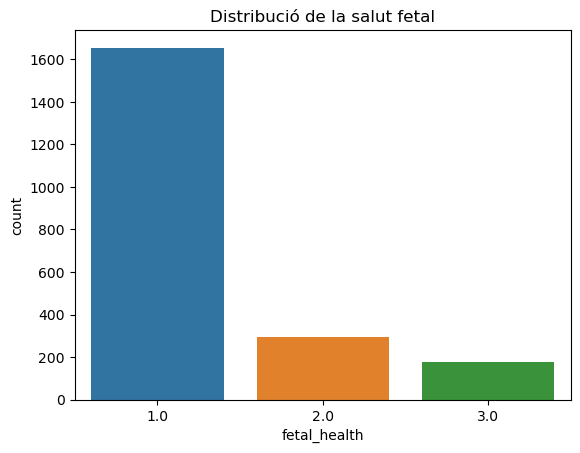

In [9]:
import seaborn as sns 

# Distribució de la variable objectiu
print("\n--- Distribució de la variable objectiu (fetal_health) ---")
print(df['fetal_health'].value_counts())
sns.countplot(x='fetal_health', data=df)
plt.title('Distribució de la salut fetal')
plt.show()


In [10]:
correlation = df.corr()
correlation

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


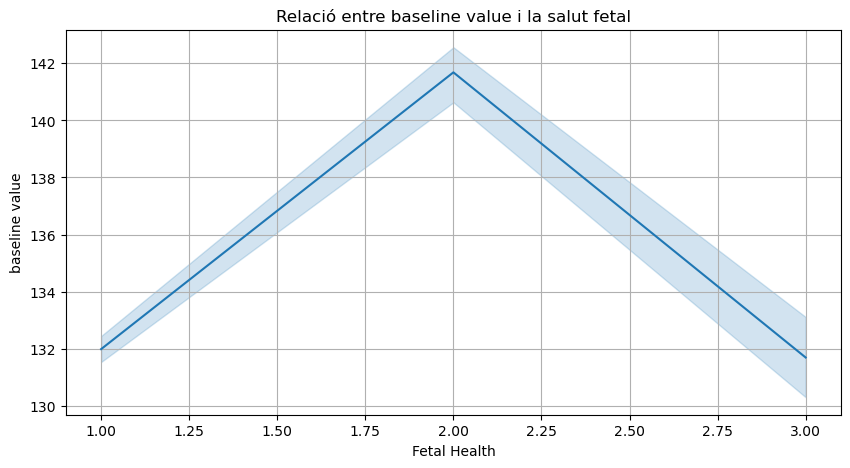

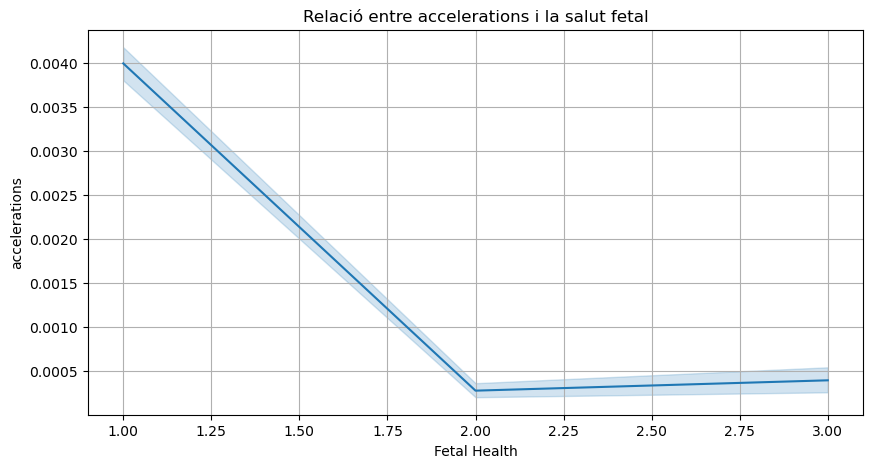

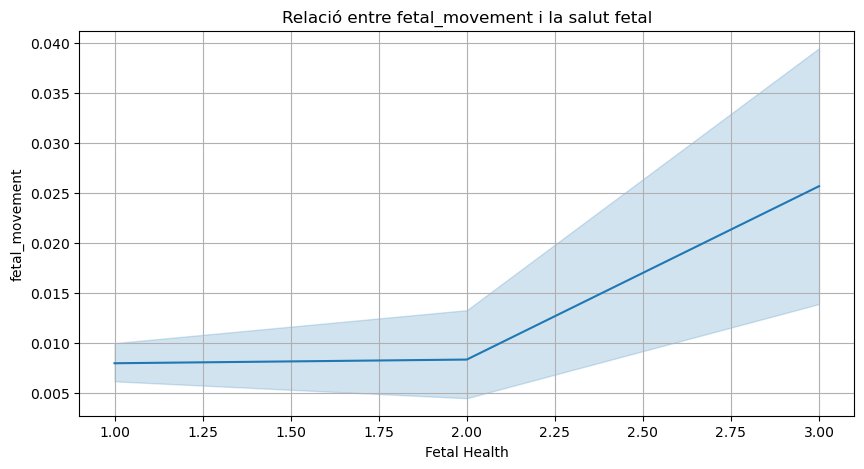

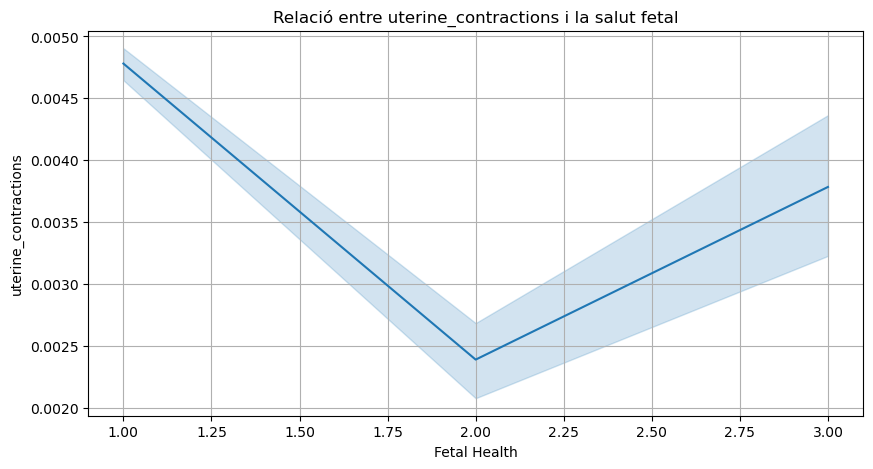

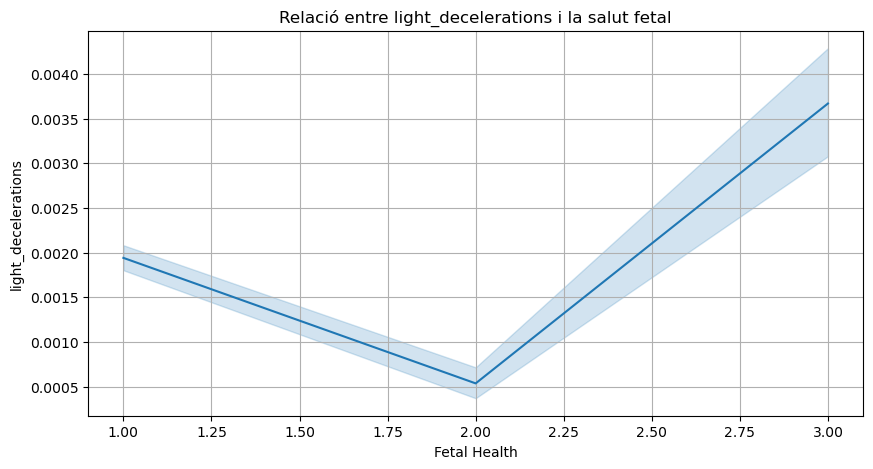

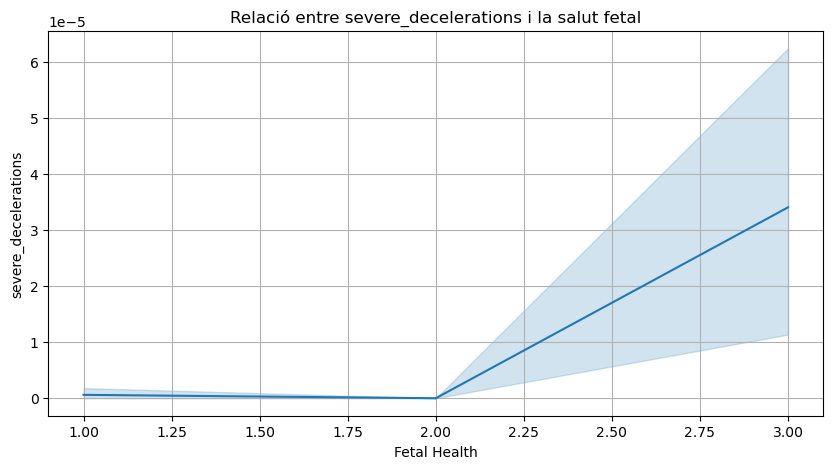

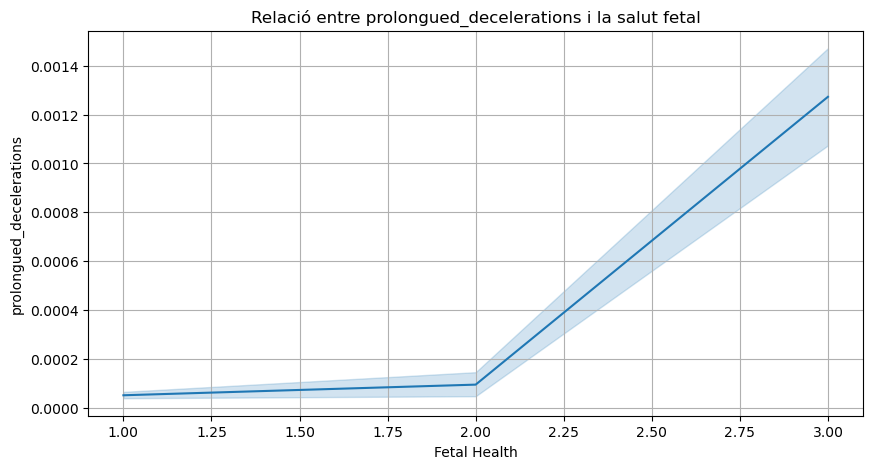

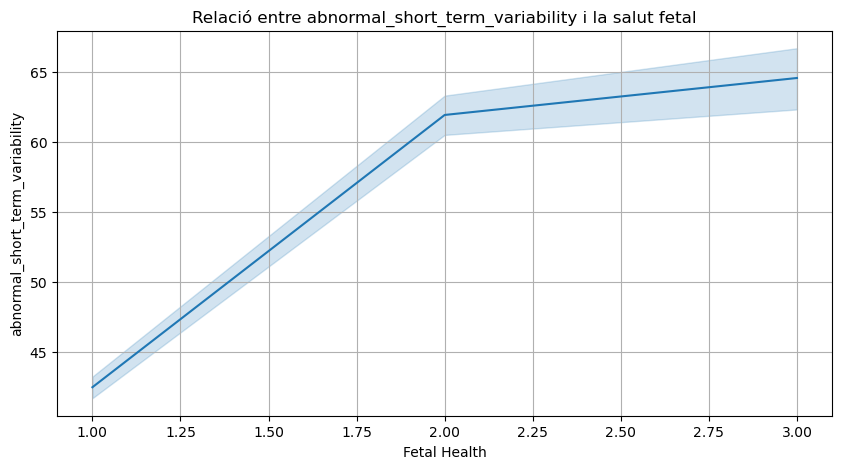

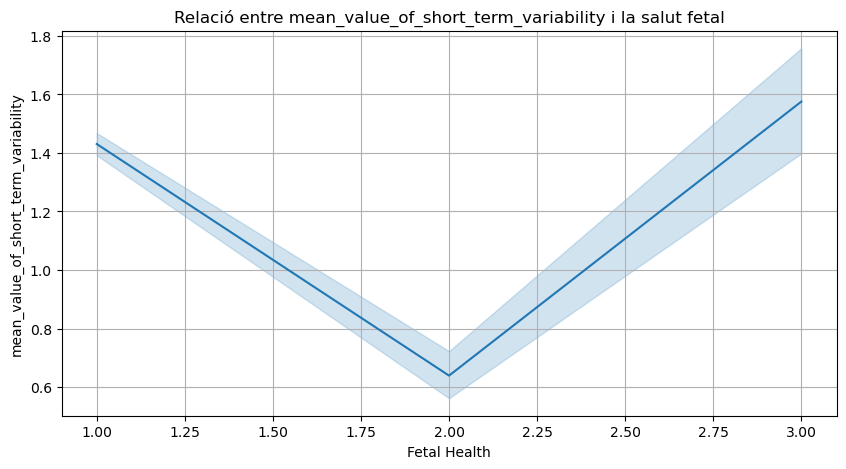

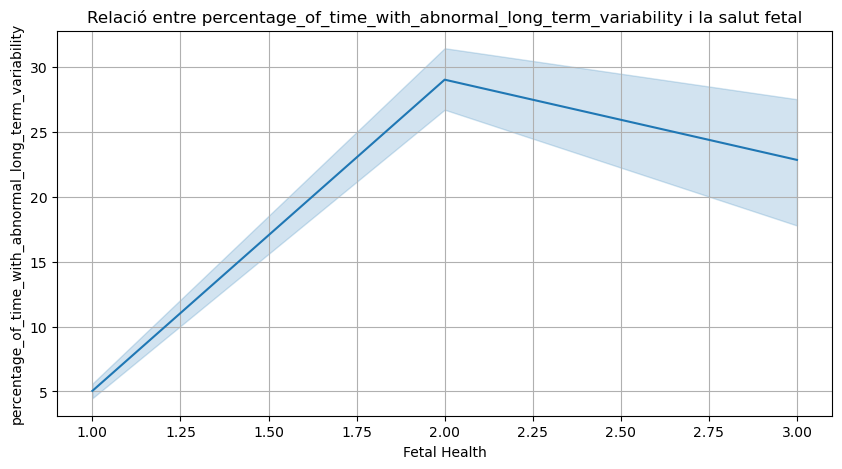

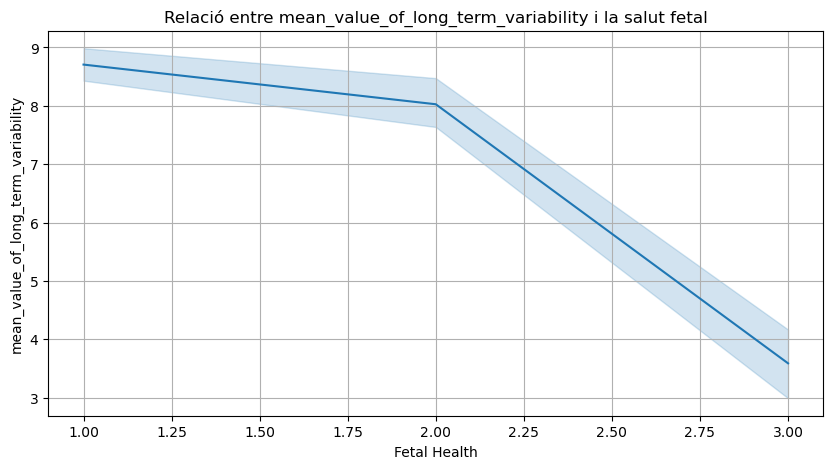

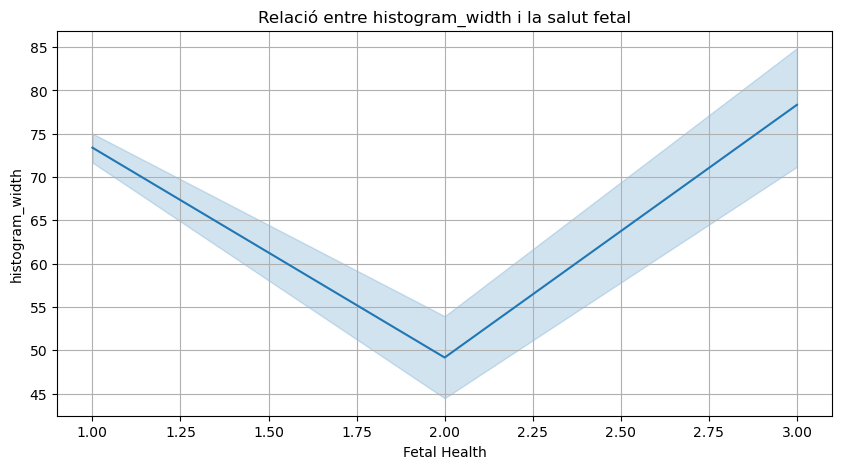

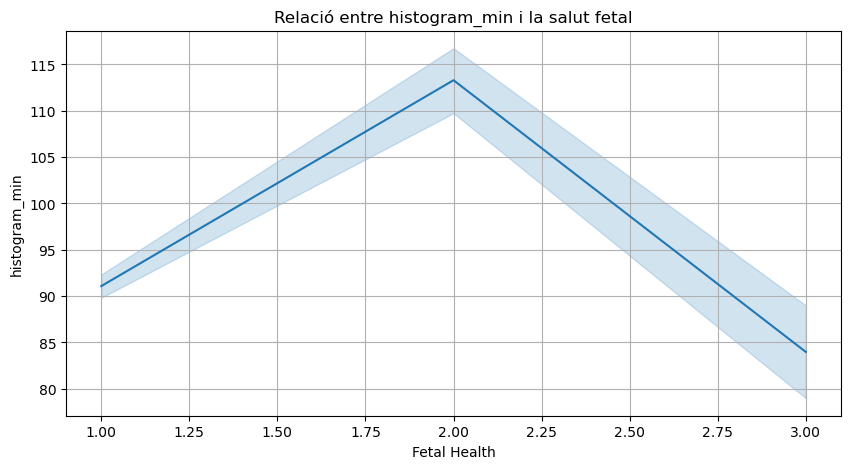

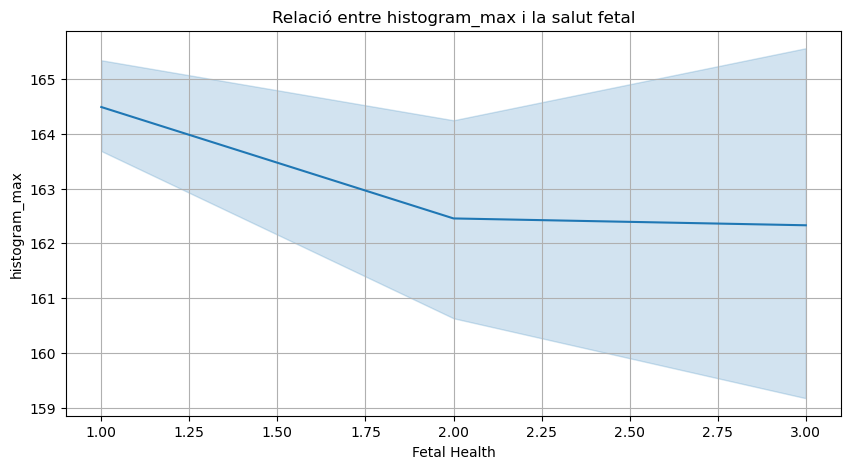

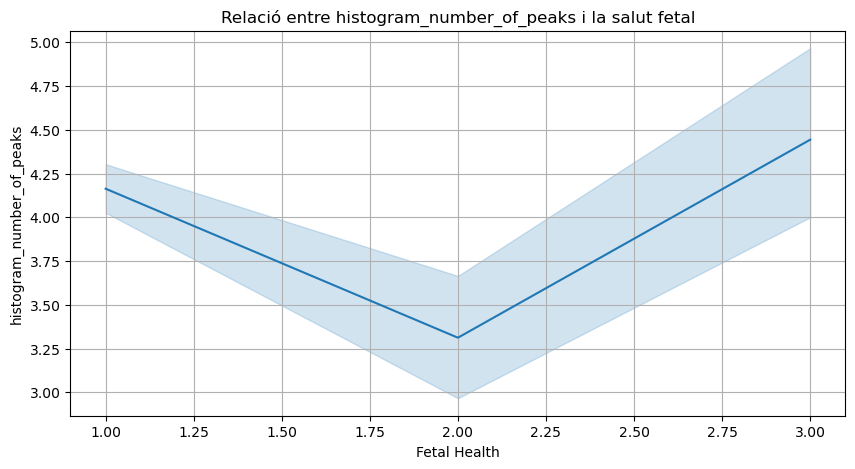

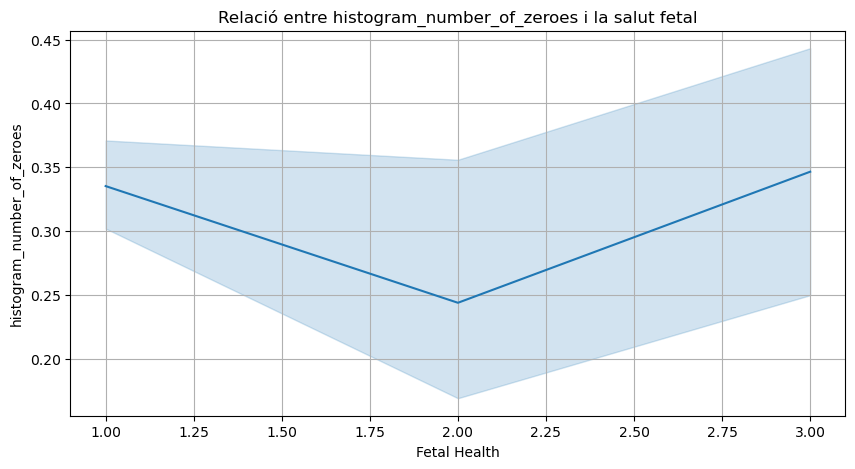

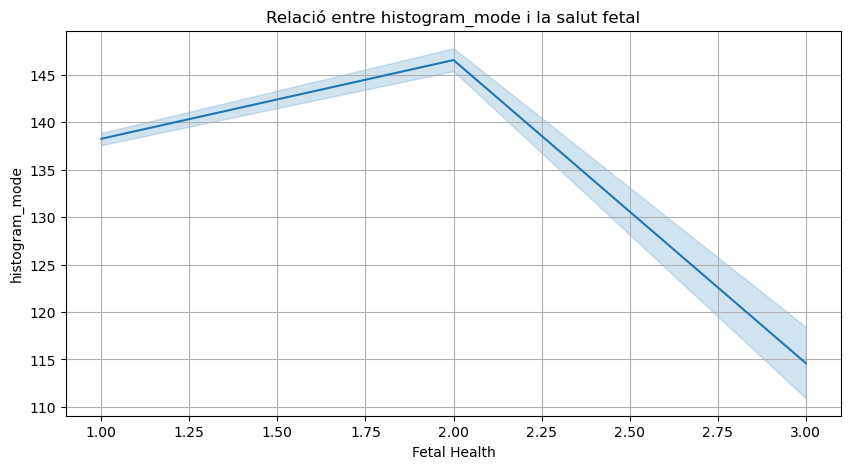

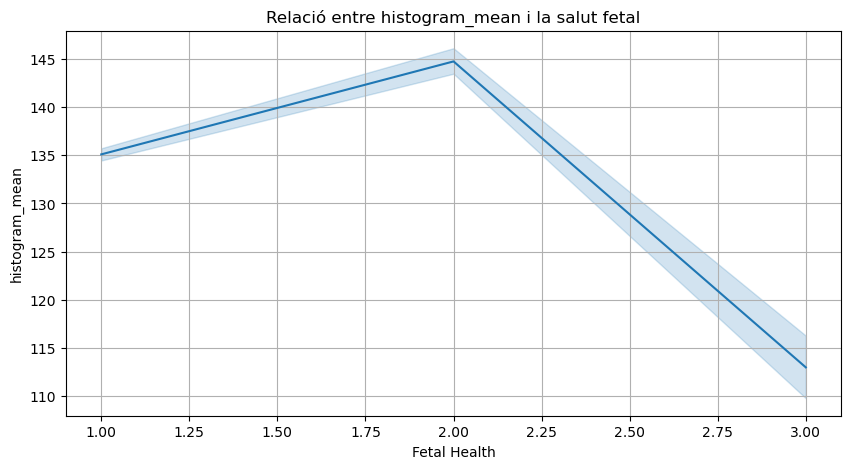

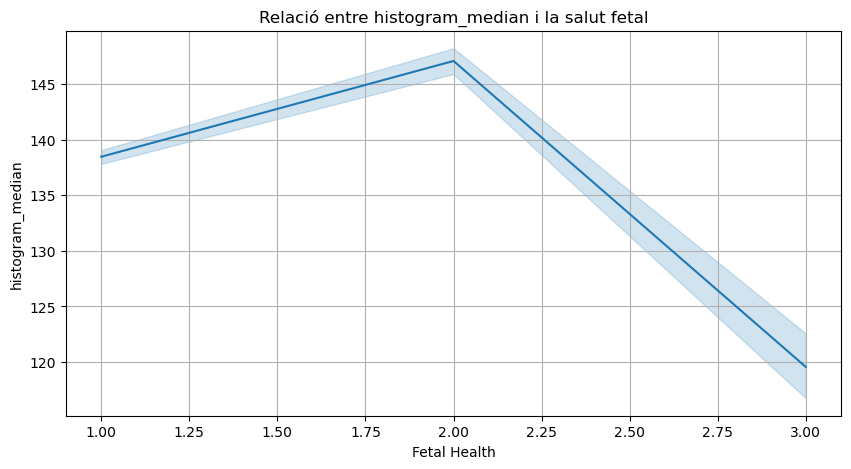

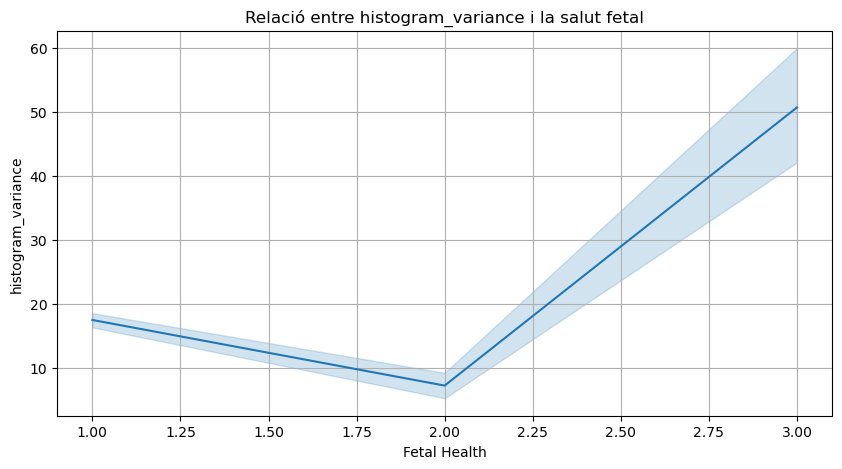

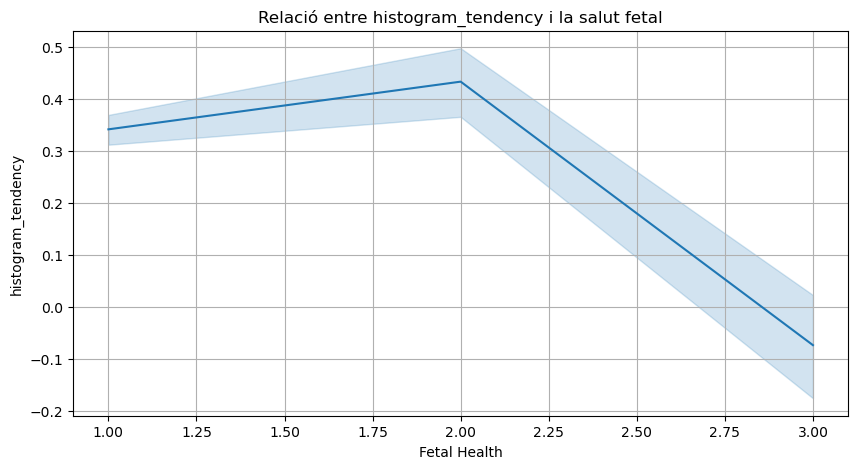

In [11]:
for column in df.columns[:-1]:  # Excloem la columna 'fetal_health'
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df['fetal_health'], y=df[column])
    plt.title(f"Relació entre {column} i la salut fetal")
    plt.xlabel('Fetal Health')
    plt.ylabel(column)
    plt.grid()
    plt.show()

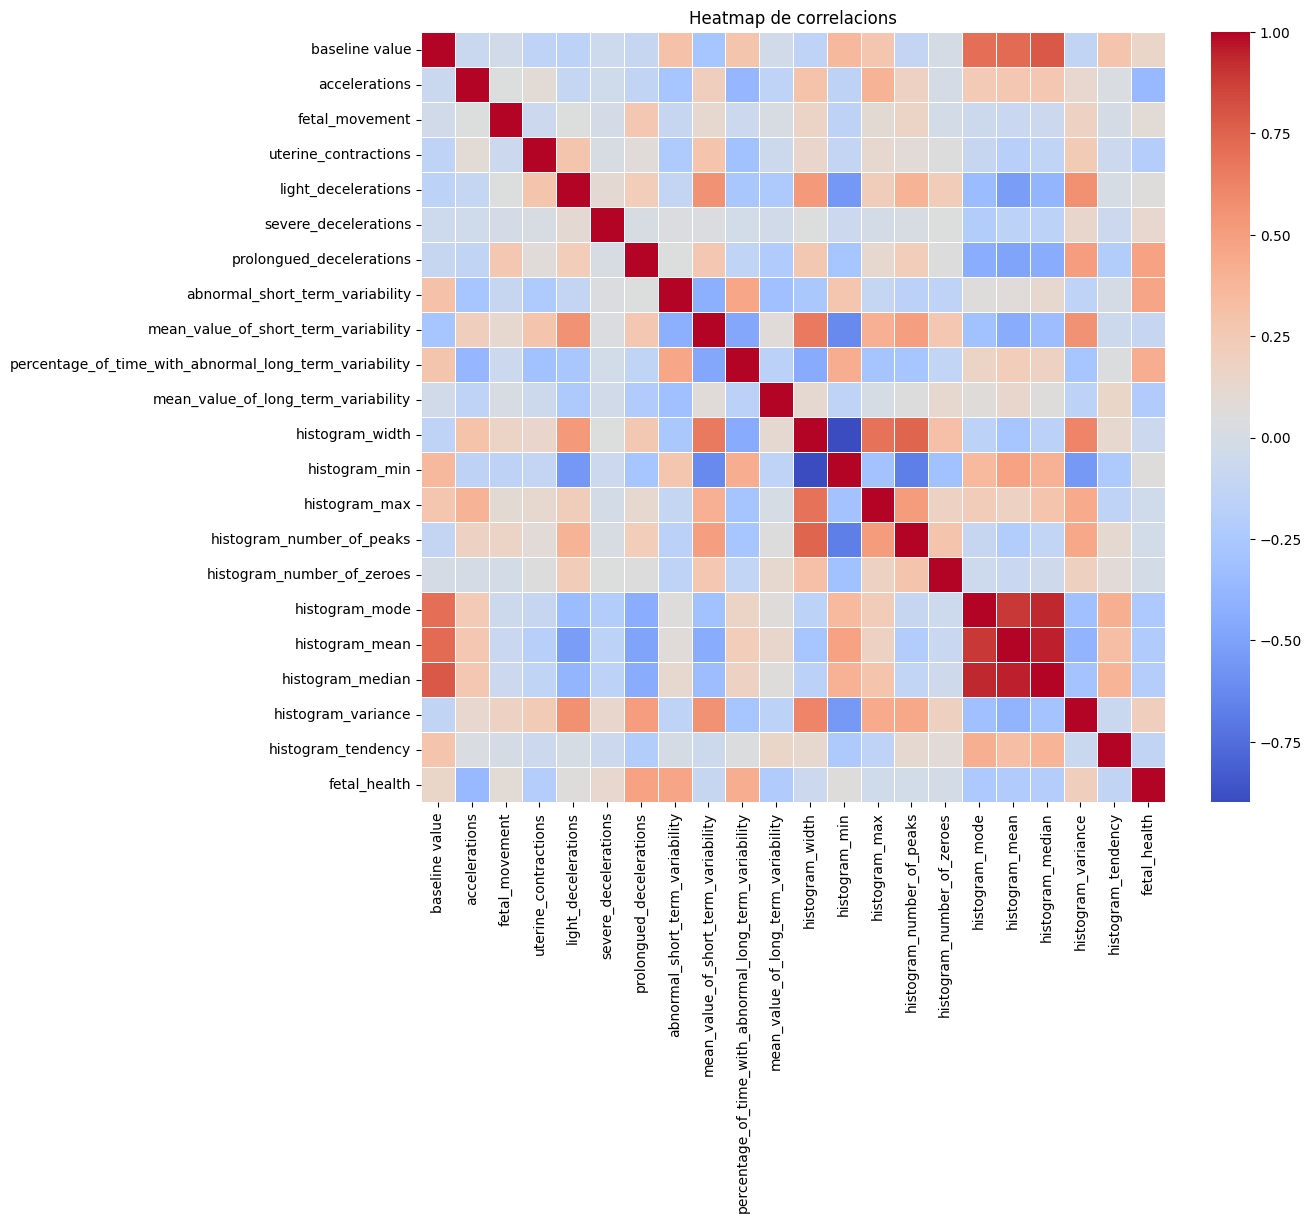

In [48]:
# Mostrar el heatmap de correlacions
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de correlacions')
plt.show()


In [49]:
# Anàlisi de variables més rellevants
# Seleccionar correlacions amb la variable objectdict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
correlations_with_target = correlation['fetal_health'].sort_values(ascending=False)
print("\n--- Correlacions amb la variable objectiu (fetal_health) ---")
print(correlations_with_target)


--- Correlacions amb la variable objectiu (fetal_health) ---
fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789


Amb la correlació, podem estudiar aquelles variables que tenen un gran afecte al target. Peró abans de tractar-les, lo que ens interessa es tenir un escalatge dels valors de totes les variables, i normalitzar-les, per que així, el nostre model, no tindrà un influencia especial a valors més grans o petits. 

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit(X)
features = scaler.transform(X)
X_scaled = pd.DataFrame(features, columns=X.columns)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


Seguidament, podem veure que hi han valors que tenen tant poca influencia que seria un malgast computacional per una returnada mínima en l'accuracy dels valors. Per aixó, volem emplear amb un projecció a dimensions menors, per facilitar la computació i evitar l'overfitting. Així utilitzem PCA, Principal Component Analysis.

In [51]:
# Explicació de les variables més influents
most_influential_features = correlations_with_target.index[1:6]  # Seleccionar les 5 més influents
print("\nLes variables més rellevants són:")
number_of_influential_features_to_keep = 0
for feature in most_influential_features:
    print(f"- {feature}: {correlations_with_target[feature]:.2f}")
    if (abs(correlations_with_target[feature]) > 0.1): # valor arbitrari
        number_of_influential_features_to_keep += 1


Les variables més rellevants són:
- prolongued_decelerations: 0.48
- abnormal_short_term_variability: 0.47
- percentage_of_time_with_abnormal_long_term_variability: 0.43
- histogram_variance: 0.21
- baseline value: 0.15


In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=number_of_influential_features_to_keep).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

print(pca.get_feature_names_out())
print(X_reduced)

['pca0' 'pca1' 'pca2' 'pca3' 'pca4']
[[ 0.26397667 -2.56837474  1.30290186  1.82611855  0.37918277]
 [-1.95445755  2.23031729 -1.09011455 -0.50123278 -0.22603509]
 [-1.97148541  1.96833311 -1.2865335  -0.21009565 -0.55469154]
 ...
 [ 2.11017553  0.85004017  1.30541708  0.40271128 -0.6326093 ]
 [ 2.1042697   0.79340029  1.39062235  0.71100856 -0.40749933]
 [ 2.31829378 -0.50829427  1.25418204 -0.24006518 -1.0263774 ]]


Una vegada transformada, i reduida, podem visualtizar la variança explicada de la reducció amb PCA.

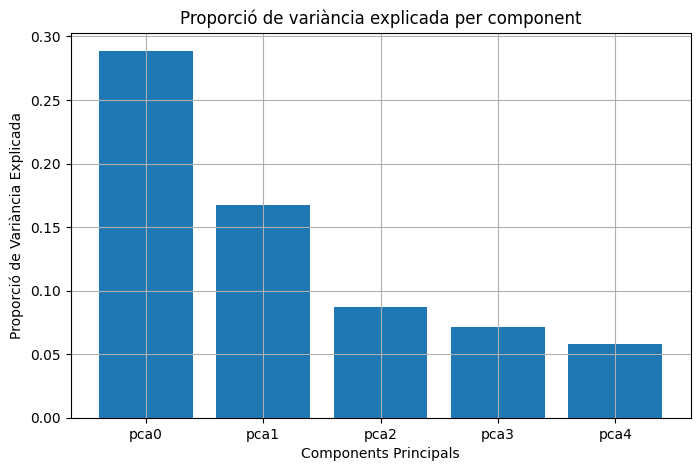

In [53]:

plt.figure(figsize=(8, 5))
plt.bar(pca.get_feature_names_out(), pca.explained_variance_ratio_)
plt.title('Proporció de variància explicada per component')
plt.xlabel('Components Principals')
plt.ylabel('Proporció de Variància Explicada')
plt.grid()
plt.show()

# Selecció de models

Ara, després del preprocessament i descomposicio de dades, podem començar a buscar, avaluar i seleccionar el model que predeix més correctament davant de dades noves.
Primer començarem amb la divisió entre Train i Test.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Ara dividit, podem mirar quins models ens convendria millor davant d'aquest dataset.
Els que hem escollit són els següents:
- Logistic Regression
- Random Forest
- SVM
- Ridge Classifier
- K-Nearest Neighbours
- Gradient Boosting


In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

resultat_models = {}

Començem aplicant una avaluació inicial a tots els models apartir d'una validació creuada.

Random Forest
Mean Accuracy: 0.89
Standard Deviation Accuracy: 0.01
Average Precision: 0.8788722836013281
Classification Report: {'1.0': {'precision': 0.9248554913294798, 'recall': 0.960960960960961, 'f1-score': 0.9425625920471281, 'support': 333.0}, '2.0': {'precision': 0.7272727272727273, 'recall': 0.625, 'f1-score': 0.6722689075630253, 'support': 64.0}, '3.0': {'precision': 0.96, 'recall': 0.8275862068965517, 'f1-score': 0.8888888888888888, 'support': 29.0}, 'accuracy': 0.9014084507042254, 'macro avg': {'precision': 0.8707094062007356, 'recall': 0.8045157226191709, 'f1-score': 0.834573462833014, 'support': 426.0}, 'weighted avg': {'precision': 0.8975641623431251, 'recall': 0.9014084507042254, 'f1-score': 0.8983012465105753, 'support': 426.0}}


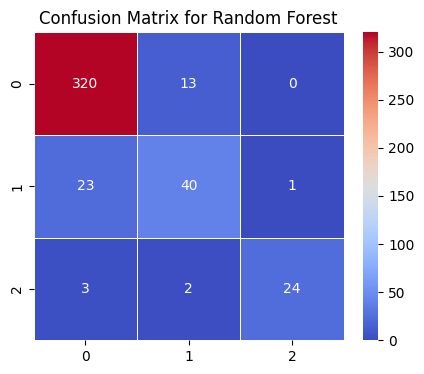

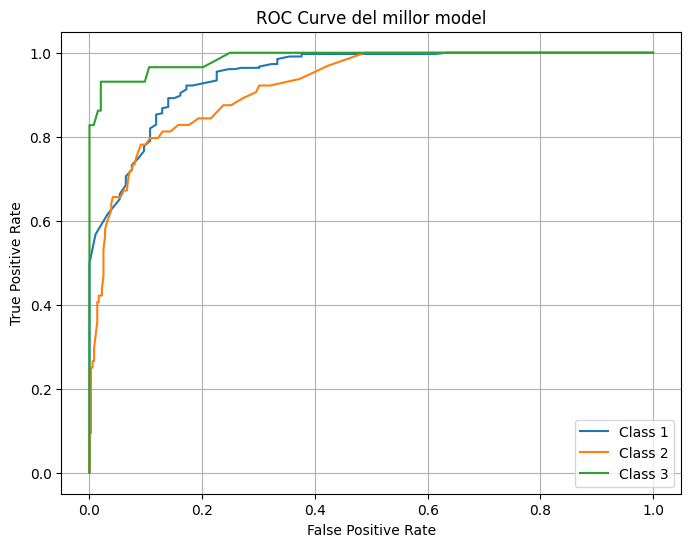

SVM
Mean Accuracy: 0.90
Standard Deviation Accuracy: 0.02
Average Precision: 0.8424029723602743
Classification Report: {'1.0': {'precision': 0.9235294117647059, 'recall': 0.9429429429429429, 'f1-score': 0.9331352154531947, 'support': 333.0}, '2.0': {'precision': 0.639344262295082, 'recall': 0.609375, 'f1-score': 0.624, 'support': 64.0}, '3.0': {'precision': 0.84, 'recall': 0.7241379310344828, 'f1-score': 0.7777777777777778, 'support': 29.0}, 'accuracy': 0.8779342723004695, 'macro avg': {'precision': 0.8009578913532627, 'recall': 0.7588186246591418, 'f1-score': 0.7783043310769907, 'support': 426.0}, 'weighted avg': {'precision': 0.875148654705475, 'recall': 0.8779342723004695, 'f1-score': 0.876116390379036, 'support': 426.0}}


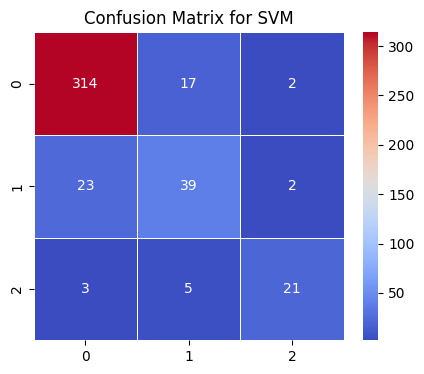

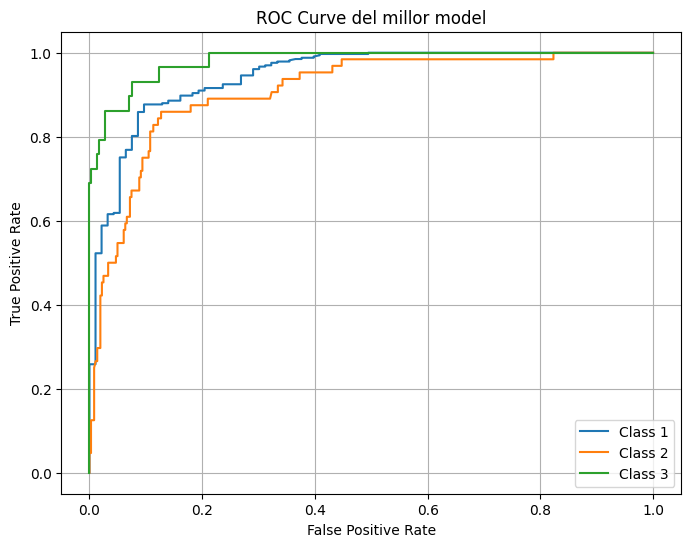

Logistic Regression
Mean Accuracy: 0.89
Standard Deviation Accuracy: 0.02
Average Precision: 0.8332465027716799
Classification Report: {'1.0': {'precision': 0.9173789173789174, 'recall': 0.9669669669669669, 'f1-score': 0.9415204678362573, 'support': 333.0}, '2.0': {'precision': 0.75, 'recall': 0.5625, 'f1-score': 0.6428571428571429, 'support': 64.0}, '3.0': {'precision': 0.7407407407407407, 'recall': 0.6896551724137931, 'f1-score': 0.7142857142857143, 'support': 29.0}, 'accuracy': 0.8873239436619719, 'macro avg': {'precision': 0.8027065527065528, 'recall': 0.7397073797935866, 'f1-score': 0.7662211083263716, 'support': 426.0}, 'weighted avg': {'precision': 0.8802081243395797, 'recall': 0.8873239436619719, 'f1-score': 0.8811818278089592, 'support': 426.0}}


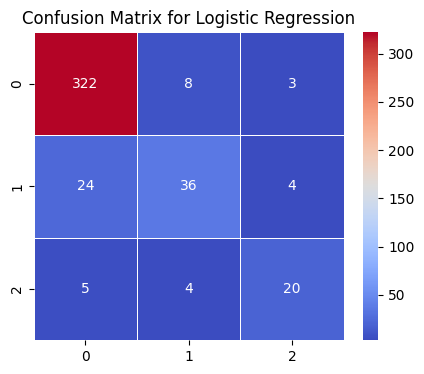

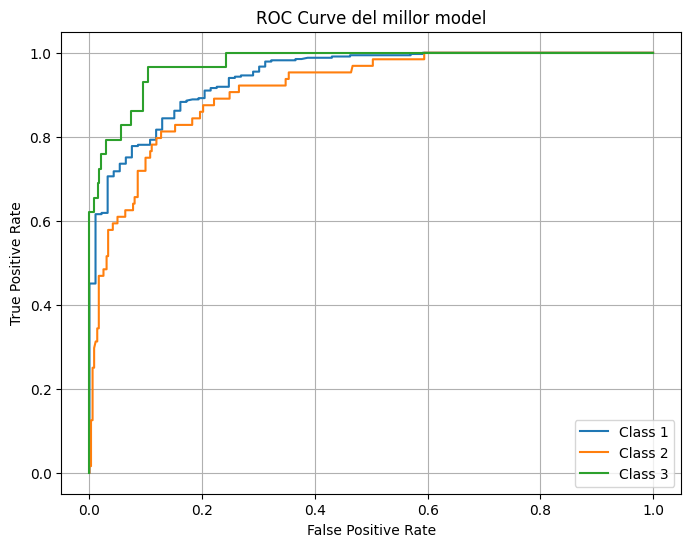

Ridge Classifier
Mean Accuracy: 0.86
Standard Deviation Accuracy: 0.02
Average Precision: None
Classification Report: {'1.0': {'precision': 0.8913043478260869, 'recall': 0.984984984984985, 'f1-score': 0.9358059914407989, 'support': 333.0}, '2.0': {'precision': 0.7073170731707317, 'recall': 0.453125, 'f1-score': 0.5523809523809524, 'support': 64.0}, '3.0': {'precision': 0.7058823529411765, 'recall': 0.41379310344827586, 'f1-score': 0.5217391304347826, 'support': 29.0}, 'accuracy': 0.8661971830985915, 'macro avg': {'precision': 0.7681679246459984, 'recall': 0.6173010294777536, 'f1-score': 0.6699753580855113, 'support': 426.0}, 'weighted avg': {'precision': 0.8510404430617556, 'recall': 0.8661971830985915, 'f1-score': 0.8500145795417269, 'support': 426.0}}


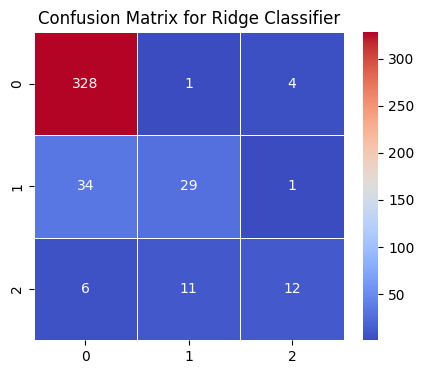

K-Nearest Neighbors
Mean Accuracy: 0.89
Standard Deviation Accuracy: 0.02
Average Precision: 0.7976205590204047
Classification Report: {'1.0': {'precision': 0.9152542372881356, 'recall': 0.972972972972973, 'f1-score': 0.9432314410480349, 'support': 333.0}, '2.0': {'precision': 0.7142857142857143, 'recall': 0.46875, 'f1-score': 0.5660377358490566, 'support': 64.0}, '3.0': {'precision': 0.7666666666666667, 'recall': 0.7931034482758621, 'f1-score': 0.7796610169491526, 'support': 29.0}, 'accuracy': 0.8849765258215962, 'macro avg': {'precision': 0.7987355394135055, 'recall': 0.7449421404162783, 'f1-score': 0.7629767312820813, 'support': 426.0}, 'weighted avg': {'precision': 0.8749466668182353, 'recall': 0.8849765258215962, 'f1-score': 0.8754287663259641, 'support': 426.0}}


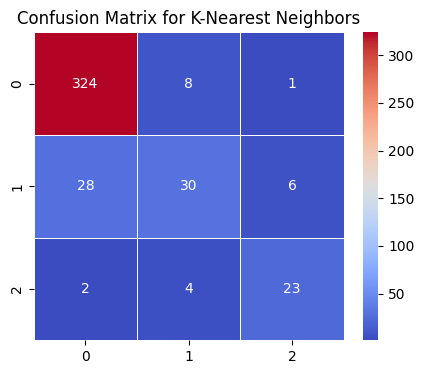

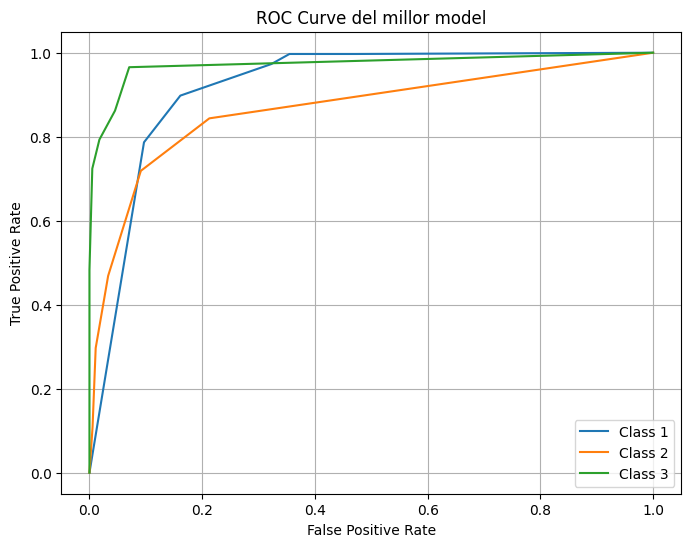

Gradient Boosting
Mean Accuracy: 0.88
Standard Deviation Accuracy: 0.01
Average Precision: 0.8668759248768358
Classification Report: {'1.0': {'precision': 0.9269005847953217, 'recall': 0.9519519519519519, 'f1-score': 0.9392592592592592, 'support': 333.0}, '2.0': {'precision': 0.6610169491525424, 'recall': 0.609375, 'f1-score': 0.6341463414634146, 'support': 64.0}, '3.0': {'precision': 0.92, 'recall': 0.7931034482758621, 'f1-score': 0.8518518518518519, 'support': 29.0}, 'accuracy': 0.8896713615023474, 'macro avg': {'precision': 0.8359725113159547, 'recall': 0.7848101334092714, 'f1-score': 0.8084191508581752, 'support': 426.0}, 'weighted avg': {'precision': 0.8864858673300583, 'recall': 0.8896713615023474, 'f1-score': 0.8874704293208815, 'support': 426.0}}


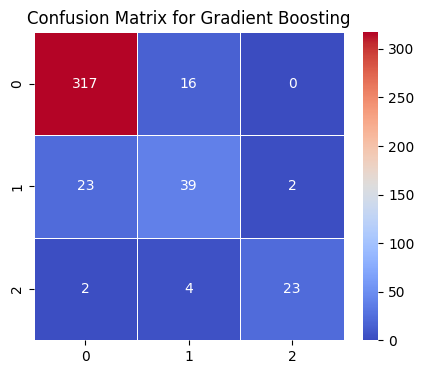

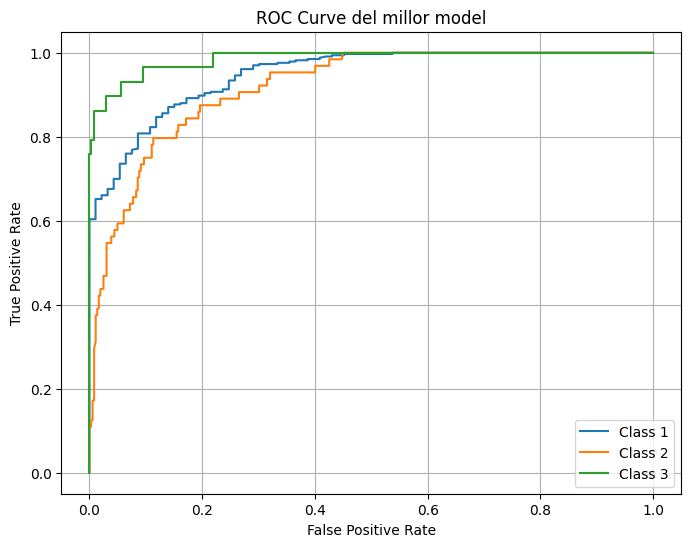

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    hasProbability = hasattr(model, "predict_proba")
    # y_probability = None
    # avg_precision = None
    # if (hasProbability):
    #     y_probability = model.predict_proba(X_test) 
    #     avg_precision = average_precision_score(y_test, y_probability[:, 1], average='macro')
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    if y_proba is not None:
        avg_precision = 0
        for i in range(y_proba.shape[1]):
            avg_precision += average_precision_score((y_test == i + 1).astype(int), y_proba[:, i])
        avg_precision /= y_proba.shape[1]
    else:
        avg_precision = None
    confMatrix = confusion_matrix(y_test, y_pred)
    
    resultat_models[model_name] = {
        "mean_accuracy": scores.mean(),
        "std_accuracy": scores.std(),
        "average_precision": avg_precision,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred, normalize="all")
    }

    print(model_name)
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print(f"Standard Deviation Accuracy: {scores.std():.2f}")
    print(f"Average Precision: {avg_precision}")
    print(f"Classification Report: {classification_report(y_test, y_pred, output_dict=True)}")

    plt.figure(figsize=(5,4))
    sns.heatmap(confMatrix, annot=True, fmt="d", cmap='coolwarm', linewidths=0.5)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    if y_proba is not None:
        fpr = {}
        tpr = {}
        for i in range(len(np.unique(y_test))):
            fpr[i], tpr[i], _ = roc_curve(y_test == i + 1, y_proba[:, i])

        plt.figure(figsize=(8, 6))
        for i in range(len(fpr)):
            plt.plot(fpr[i], tpr[i], label=f'Class {i + 1}')
        plt.title('ROC Curve del millor model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.grid()
        plt.show()



Una vegada creat els models, fitar-los a les dades, fent un cross validation i que ens donen l'Accuracy i altres metriques per cada model.
Comparant-los tenim que:

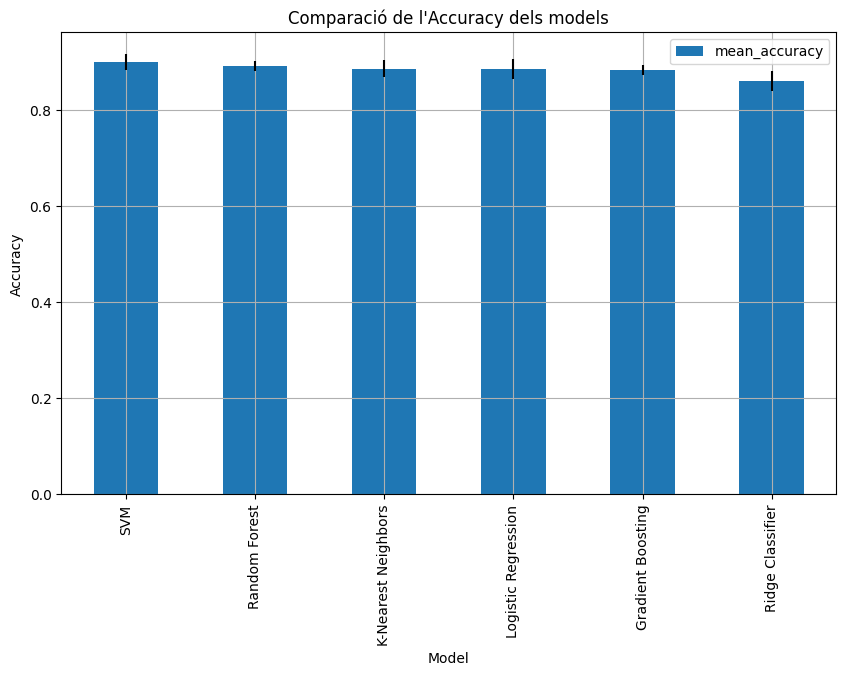

In [79]:
resultat_models_df = pd.DataFrame({model_name: {
    "mean_accuracy": resultats["mean_accuracy"],
    "std_accuracy": resultats["std_accuracy"],
    "average_precision": resultats["average_precision"]
} for model_name, resultats in resultat_models.items()}).T
resultat_models_df = resultat_models_df.sort_values("mean_accuracy", ascending=False)

resultat_models_df.plot(kind="bar", y="mean_accuracy", yerr="std_accuracy", legend=True, figsize=(10, 6))
plt.title("Comparació de l'Accuracy dels models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


--- Mètriques del millor model: {best_model_name} ---
              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       333
         2.0       0.64      0.61      0.62        64
         3.0       0.84      0.72      0.78        29

    accuracy                           0.88       426
   macro avg       0.80      0.76      0.78       426
weighted avg       0.88      0.88      0.88       426



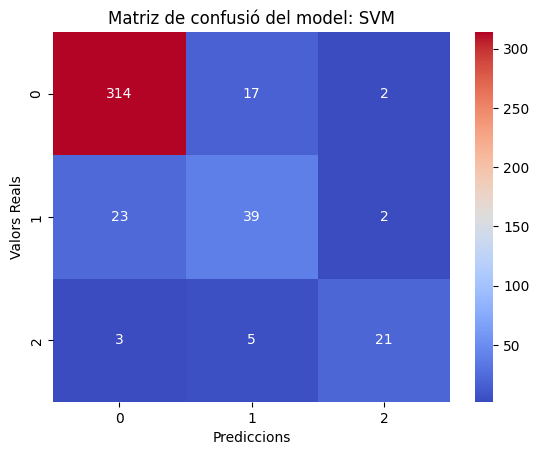

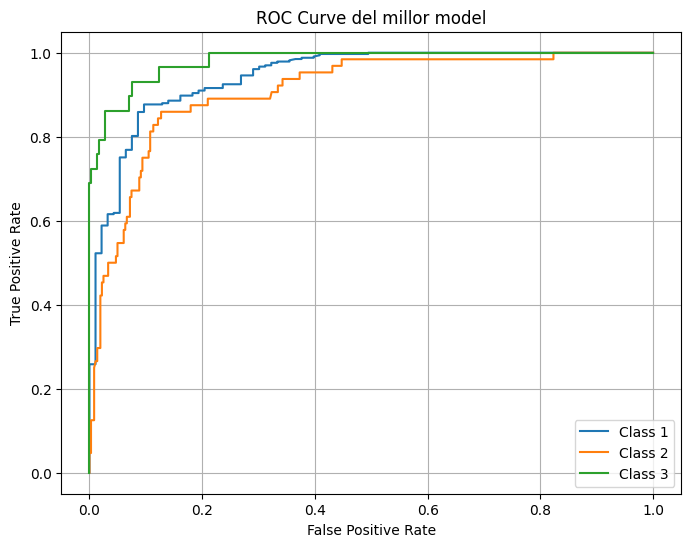

In [87]:

best_model_name = resultat_models_df["mean_accuracy"].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

# Visualització del millor model
print("\n--- Mètriques del millor model: {best_model_name} ---")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Matriz de confusió del model: {best_model_name}')
plt.xlabel('Prediccions')
plt.ylabel('Valors Reals')
plt.show()

if y_proba is not None:
    fpr = {}
    tpr = {}
    for i in range(len(np.unique(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test == i + 1, y_proba[:, i])

    plt.figure(figsize=(8, 6))
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], label=f'Class {i + 1}')
    plt.title('ROC Curve del millor model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

In [88]:
print(f"El millor model és: {best_model_name}")

El millor model és: SVM


# Conclusió 
En aquesta pràctica, hem treballat amb dades mèdiques que representen diversos paràmetres fisiològics i clínics del fetus per predir el seu estat de salut. El dataset contenia dades de bona qualitat, ja que no s'han trobat valors nuls o incomplets, i hem pogut observar una varietat de mesures amb distribucions molt diverses. Tot i això, s'ha detectat un fort desequilibri en la variable objectiu fetal_health, amb un 77,8% de casos en la categoria 1.0 (normal), un 13,9% en 2.0 (suspect) i només un 8,3% en 3.0 (patològic). Aquest desequilibri ha requerit tècniques d'ajustament per assegurar que el model no fos parcial cap a la classe majoritària.

En termes de resultats del model, s'ha prestat especial atenció a evitar problemes com l'overfitting. L'anàlisi de les mètriques entre el conjunt d'entrenament i el de validació ha indicat que, tot i que el model ha mostrat un bon rendiment general, en algunes configuracions inicials sí que s'han detectat símptomes d'overfitting. Això es va evidenciar en una discrepància significativa entre l'accuracy en entrenament i en validació. Per mitigar-ho, hem implementat regularització i ajustat hiperparàmetres, a més d'optar per tècniques com la validació creuada.

Anomalies: S'han detectat alguns valors extrems en variables com fetal_movement i histogram_variance, que podrien representar casos clínics atípics. Aquestes anomalies no s'han eliminat, ja que poden contenir informació rellevant per a la detecció de condicions patològiques.

Aquest exercici ens ha permès entendre millor com gestionar dades mèdiques i implementar models predictius amb consideració per problemes com l'overfitting i el desequilibri de classes. També hem vist la importància de prioritzar mètriques com la sensibilitat i el recall, especialment per detectar casos crítics com els patològics. En conjunt, aquesta pràctica ha servit com un exemple pràctic de com el machine learning pot ajudar a identificar riscos en el camp de la salut, però també subratlla la necessitat de validar rigorosament els resultats abans d'aplicar-los en contextos reals.